In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
# Just for theme
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

In [2]:
DATADIR = '../data/image_data/train'
CATEGORIES = ['neutral','fire','smoke']

In [3]:
IMG_SIZE = 64
def create_training_data():
    training_data = []
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return training_data

In [4]:
training_data = create_training_data()

100%|█████████████████████████████████████████████████████████████████████████████| 1380/1380 [00:01<00:00, 722.16it/s]


In [5]:
import random
print(len(training_data))
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

4410
2
1
2
2
1
1
1
0
2
2


In [6]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
X=np.array(X)
Y=np.array(Y)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=0,shuffle=True)

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=3, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, batch_size=64, epochs=100,validation_data=(x_test, y_test))

Train on 3087 samples, validate on 1323 samples
Epoch 1/100
3087/3087 [==============================] - ETA: 2:18 - loss: 1.1086 - accuracy: 0.26 - ETA: 17s - loss: 1.1058 - accuracy: 0.3326 - ETA: 8s - loss: 1.0958 - accuracy: 0.371 - ETA: 4s - loss: 1.0778 - accuracy: 0.39 - ETA: 2s - loss: 1.0543 - accuracy: 0.41 - ETA: 1s - loss: 1.0383 - accuracy: 0.43 - ETA: 0s - loss: 1.0365 - accuracy: 0.44 - ETA: 0s - loss: 1.0279 - accuracy: 0.45 - 4s 1ms/sample - loss: 1.0093 - accuracy: 0.4674 - val_loss: 0.9517 - val_accuracy: 0.5412
Epoch 2/100
3087/3087 [==============================] - ETA: 0s - loss: 0.7857 - accuracy: 0.62 - ETA: 0s - loss: 0.9297 - accuracy: 0.59 - ETA: 0s - loss: 0.9258 - accuracy: 0.57 - ETA: 0s - loss: 0.9259 - accuracy: 0.57 - ETA: 0s - loss: 0.9207 - accuracy: 0.58 - ETA: 0s - loss: 0.9089 - accuracy: 0.58 - ETA: 0s - loss: 0.9123 - accuracy: 0.57 - ETA: 0s - loss: 0.8988 - accuracy: 0.58 - 1s 168us/sample - loss: 0.8953 - accuracy: 0.5905 - val_loss: 0.8661 -

3087/3087 [==============================] - ETA: 0s - loss: 0.3267 - accuracy: 0.85 - ETA: 0s - loss: 0.3968 - accuracy: 0.84 - ETA: 0s - loss: 0.4062 - accuracy: 0.83 - ETA: 0s - loss: 0.4086 - accuracy: 0.83 - ETA: 0s - loss: 0.4150 - accuracy: 0.83 - ETA: 0s - loss: 0.4149 - accuracy: 0.83 - ETA: 0s - loss: 0.4216 - accuracy: 0.82 - 0s 162us/sample - loss: 0.4210 - accuracy: 0.8322 - val_loss: 0.4939 - val_accuracy: 0.7914
Epoch 19/100
3087/3087 [==============================] - ETA: 0s - loss: 0.3018 - accuracy: 0.85 - ETA: 0s - loss: 0.3870 - accuracy: 0.83 - ETA: 0s - loss: 0.4013 - accuracy: 0.83 - ETA: 0s - loss: 0.3873 - accuracy: 0.84 - ETA: 0s - loss: 0.3875 - accuracy: 0.84 - ETA: 0s - loss: 0.3888 - accuracy: 0.83 - ETA: 0s - loss: 0.3997 - accuracy: 0.83 - 1s 166us/sample - loss: 0.3995 - accuracy: 0.8354 - val_loss: 0.4902 - val_accuracy: 0.7952
Epoch 20/100
3087/3087 [==============================] - ETA: 0s - loss: 0.3633 - accuracy: 0.90 - ETA: 0s - loss: 0.3611 - 

3087/3087 [==============================] - ETA: 0s - loss: 0.1443 - accuracy: 0.93 - ETA: 0s - loss: 0.2110 - accuracy: 0.90 - ETA: 0s - loss: 0.2281 - accuracy: 0.89 - ETA: 0s - loss: 0.2282 - accuracy: 0.89 - ETA: 0s - loss: 0.2260 - accuracy: 0.90 - ETA: 0s - loss: 0.2321 - accuracy: 0.89 - ETA: 0s - loss: 0.2433 - accuracy: 0.89 - ETA: 0s - loss: 0.2396 - accuracy: 0.89 - 1s 176us/sample - loss: 0.2385 - accuracy: 0.8989 - val_loss: 0.5352 - val_accuracy: 0.7906
Epoch 36/100
3087/3087 [==============================] - ETA: 0s - loss: 0.2340 - accuracy: 0.90 - ETA: 0s - loss: 0.2375 - accuracy: 0.89 - ETA: 0s - loss: 0.2302 - accuracy: 0.89 - ETA: 0s - loss: 0.2239 - accuracy: 0.89 - ETA: 0s - loss: 0.2296 - accuracy: 0.89 - ETA: 0s - loss: 0.2293 - accuracy: 0.89 - ETA: 0s - loss: 0.2369 - accuracy: 0.89 - ETA: 0s - loss: 0.2381 - accuracy: 0.89 - 1s 167us/sample - loss: 0.2384 - accuracy: 0.8941 - val_loss: 0.5195 - val_accuracy: 0.7937
Epoch 37/100
3087/3087 [=================

3087/3087 [==============================] - ETA: 0s - loss: 0.1221 - accuracy: 0.92 - ETA: 0s - loss: 0.1820 - accuracy: 0.90 - ETA: 0s - loss: 0.1765 - accuracy: 0.90 - ETA: 0s - loss: 0.1713 - accuracy: 0.91 - ETA: 0s - loss: 0.1805 - accuracy: 0.91 - ETA: 0s - loss: 0.1858 - accuracy: 0.91 - ETA: 0s - loss: 0.1814 - accuracy: 0.91 - 1s 162us/sample - loss: 0.1877 - accuracy: 0.9116 - val_loss: 0.5914 - val_accuracy: 0.7876
Epoch 53/100
3087/3087 [==============================] - ETA: 0s - loss: 0.1739 - accuracy: 0.96 - ETA: 0s - loss: 0.1773 - accuracy: 0.91 - ETA: 0s - loss: 0.1807 - accuracy: 0.91 - ETA: 0s - loss: 0.1854 - accuracy: 0.91 - ETA: 0s - loss: 0.1838 - accuracy: 0.92 - ETA: 0s - loss: 0.1874 - accuracy: 0.91 - ETA: 0s - loss: 0.1807 - accuracy: 0.92 - 0s 159us/sample - loss: 0.1827 - accuracy: 0.9213 - val_loss: 0.6436 - val_accuracy: 0.7914
Epoch 54/100
3087/3087 [==============================] - ETA: 0s - loss: 0.2184 - accuracy: 0.90 - ETA: 0s - loss: 0.1985 - 

Epoch 70/100
3087/3087 [==============================] - ETA: 0s - loss: 0.1798 - accuracy: 0.90 - ETA: 0s - loss: 0.1455 - accuracy: 0.92 - ETA: 0s - loss: 0.1391 - accuracy: 0.93 - ETA: 0s - loss: 0.1517 - accuracy: 0.92 - ETA: 0s - loss: 0.1575 - accuracy: 0.92 - ETA: 0s - loss: 0.1572 - accuracy: 0.92 - ETA: 0s - loss: 0.1623 - accuracy: 0.92 - 1s 170us/sample - loss: 0.1583 - accuracy: 0.9226 - val_loss: 0.6380 - val_accuracy: 0.7944
Epoch 71/100
3087/3087 [==============================] - ETA: 0s - loss: 0.1058 - accuracy: 0.93 - ETA: 0s - loss: 0.1555 - accuracy: 0.90 - ETA: 0s - loss: 0.1495 - accuracy: 0.91 - ETA: 0s - loss: 0.1545 - accuracy: 0.92 - ETA: 0s - loss: 0.1576 - accuracy: 0.92 - ETA: 0s - loss: 0.1527 - accuracy: 0.92 - ETA: 0s - loss: 0.1489 - accuracy: 0.92 - ETA: 0s - loss: 0.1514 - accuracy: 0.92 - 1s 172us/sample - loss: 0.1508 - accuracy: 0.9223 - val_loss: 0.6659 - val_accuracy: 0.7914
Epoch 72/100
3087/3087 [==============================] - ETA: 0s - lo

3087/3087 [==============================] - ETA: 0s - loss: 0.0850 - accuracy: 0.96 - ETA: 0s - loss: 0.1118 - accuracy: 0.95 - ETA: 0s - loss: 0.1291 - accuracy: 0.93 - ETA: 0s - loss: 0.1242 - accuracy: 0.94 - ETA: 0s - loss: 0.1289 - accuracy: 0.93 - ETA: 0s - loss: 0.1314 - accuracy: 0.93 - ETA: 0s - loss: 0.1372 - accuracy: 0.93 - ETA: 0s - loss: 0.1355 - accuracy: 0.93 - 1s 166us/sample - loss: 0.1349 - accuracy: 0.9346 - val_loss: 0.7083 - val_accuracy: 0.7846
Epoch 88/100
3087/3087 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.96 - ETA: 0s - loss: 0.1102 - accuracy: 0.94 - ETA: 0s - loss: 0.1062 - accuracy: 0.95 - ETA: 0s - loss: 0.1119 - accuracy: 0.94 - ETA: 0s - loss: 0.1189 - accuracy: 0.93 - ETA: 0s - loss: 0.1170 - accuracy: 0.94 - ETA: 0s - loss: 0.1158 - accuracy: 0.94 - 0s 159us/sample - loss: 0.1153 - accuracy: 0.9407 - val_loss: 0.7780 - val_accuracy: 0.7906
Epoch 89/100
3087/3087 [==============================] - ETA: 0s - loss: 0.1333 - 

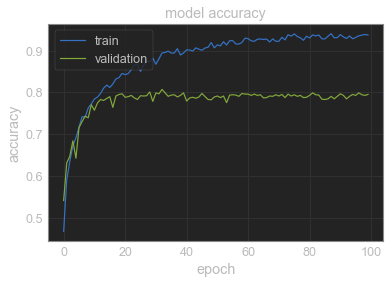

In [11]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

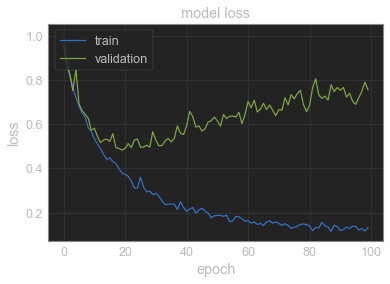

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [27]:
# Save the keras(.h5) model
import tensorflow as tf
from tensorflow.keras.utils import plot_model
model.save('./trained_model.h5')

In [22]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Save the tflite model.
with open('../Raspi_codes/lite_model.tflite', 'wb') as f:
  f.write(tflite_model)

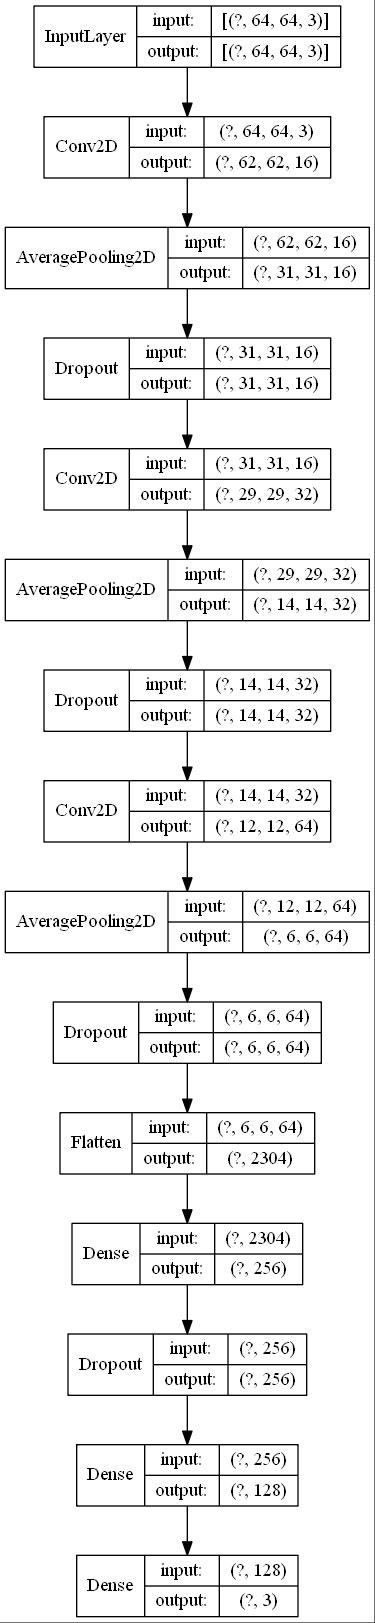

In [19]:
plot_model(model, to_file='../model_flow.jpg', show_layer_names=False, show_shapes=True)